<a href="https://colab.research.google.com/github/Shivani985/Coursera_Capstone/blob/master/Exploring_venues_in_Kolkata%2CIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # library to handle data in a vectorized manner
 
import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
 
import json # library to handle JSON files
 
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
 
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
 
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
 
print('Libraries imported.')

Libraries imported.


In [ ]:
K_latitude=22.572645
K_longitude=88.363892

address = 'Kolkata'

geolocator = Nominatim(user_agent="kolkata")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kolkata are {}, {}.'.format(latitude, longitude))
Kolkata_map = folium.Map(location = [K_latitude,K_longitude])
folium.Marker([latitude,longitude]).add_to(Kolkata_map)
Kolkata_map

The geograpical coordinate of Kolkata are 22.54541245, 88.3567751581234.


In [ ]:
CLIENT_ID = 'GSUCBDHUHLEUJQ5KDVUT134ALFKONDVBNIBNQ1DR32DMLMXB'
CLIENT_SECRET = 'ZRU2OYK1JKGDRGRWBJHLKWBZBJJWMNHLYU4B505VPH21GS3W'
RADIUS = 4000 # 4 Km
NO_OF_VENUES = 100  
VERSION = '20200629'

In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        K_latitude, 
                                                                        K_longitude, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
    

Total 100 venues fetched within a total radius of 4.0 Km


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total 31 venues fetched within a total radius of 4.0 Km


In [ ]:
headers = {'user-key': '957046816205e98885ae723903eb0841'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])


Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [ ]:
Kolkata_map = folium.Map(location = [K_latitude,K_longitude], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Kolkata_map)  


Kolkata_map

In [ ]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [ ]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [ ]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Blue & Beyond,Pub,22.5591,88.3533,Blue And Beyond,22.5591,88.3532,1600.0,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",0.0000,-0.0001
1,Lalit Great Eastern Hotel,Hotel,22.5680,88.3500,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,1500.0,3.0,3.8,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",0.0000,0.0000
2,Peter Cat,Indian Restaurant,22.5524,88.3525,Peter Cat,22.5525,88.3526,1000.0,3.0,4.4,"18A, Park Street, Park Street Area, Kolkata",0.0001,0.0001
3,The Blue Poppy,Asian Restaurant,22.5485,88.3514,Blue Poppy-Thakali,22.5486,88.3512,500.0,2.0,4.0,"Sikkim Commercial House, 1st Floor, 4/1 Middle...",0.0001,-0.0002
4,Arsalan,Mughlai Restaurant,22.5539,88.3541,Arsalan,22.5539,88.3543,1000.0,3.0,4.2,"119 A, Muzaffar Ahmed Street, Mirza Ghalib Str...",0.0000,0.0002
5,Anand Restaurant,South Indian Restaurant,22.5673,88.3549,Anand Restaurant,22.5675,88.3550,500.0,2.0,4.4,"19, C.R. Avenue, Near Dalhousie Square Area, C...",0.0002,0.0001
6,College Street Market,Bookstore,22.5763,88.3636,Indian Coffee House,22.5761,88.3639,300.0,1.0,3.0,"15, Bankim Chatterjee Street, College Street, ...",-0.0002,0.0003
7,Cafe Coffee Day,Café,22.5776,88.3904,Cafe Coffee Day,22.5778,88.3904,700.0,2.0,3.6,"P-183 A, CIT Road, Scheme 6M, Kankurgachhi, Ko...",0.0002,0.0000
8,Oxford Bookstore,Bookstore,22.5537,88.3517,Burgrill,22.5537,88.3518,500.0,2.0,4.0,"12B/2, Park Street Park, Opposite Oxford Book ...",0.0000,0.0001
9,Esplanade,Neighborhood,22.5642,88.3523,Nutri Bowl,22.5642,88.3524,200.0,1.0,4.1,"3A, 1st Floor, Jawaharlal Nehru Road, Esplanad...",0.0000,0.0001


In [ ]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [ ]:
selected_venues.head(5)

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Pub,Blue And Beyond,22.5591,88.3532,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",800.0
1,Hotel,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,3.0,3.8,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",750.0
2,Indian Restaurant,Peter Cat,22.5525,88.3526,3.0,4.4,"18A, Park Street, Park Street Area, Kolkata",500.0
3,Asian Restaurant,Blue Poppy-Thakali,22.5486,88.3512,2.0,4.0,"Sikkim Commercial House, 1st Floor, 4/1 Middle...",250.0
4,Mughlai Restaurant,Arsalan,22.5539,88.3543,3.0,4.2,"119 A, Muzaffar Ahmed Street, Mirza Ghalib Str...",500.0


In [ ]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 71


<BarContainer object of 35 artists>

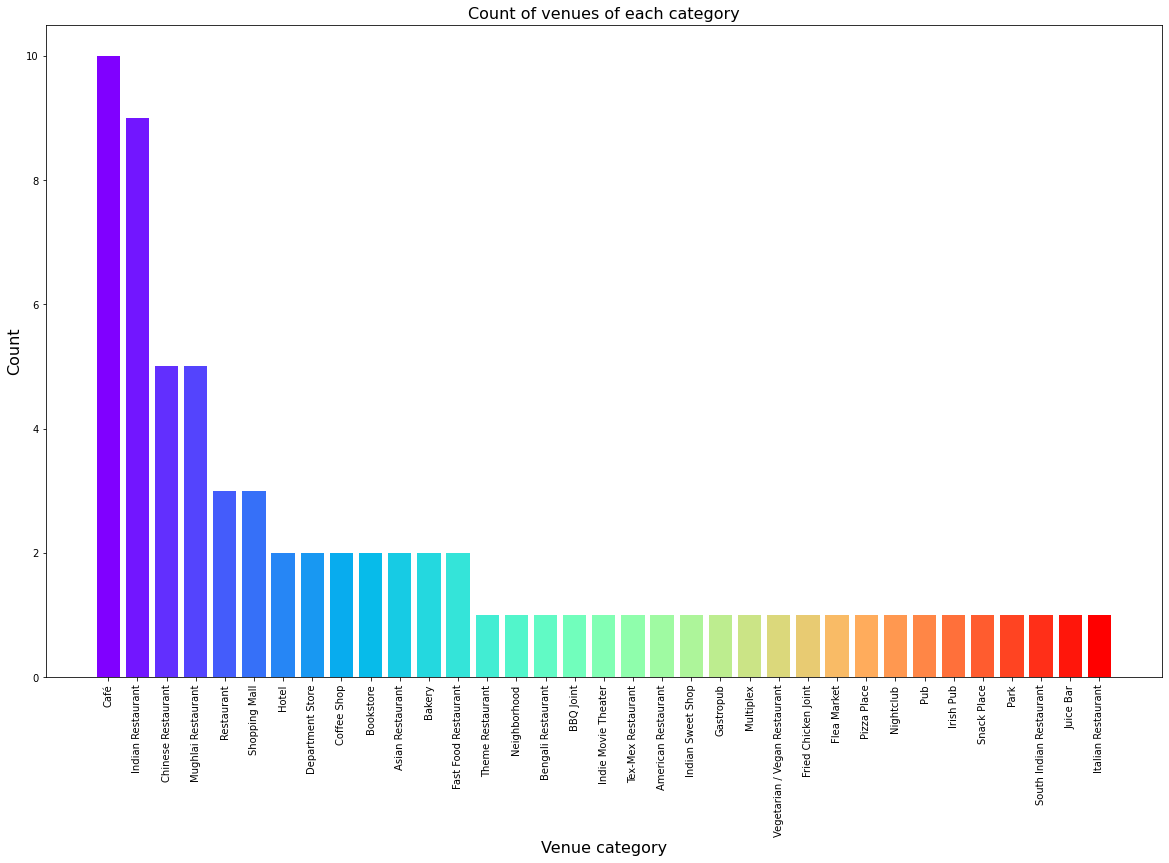

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

Text(0.5, 1.0, 'Count of venues with given rating')

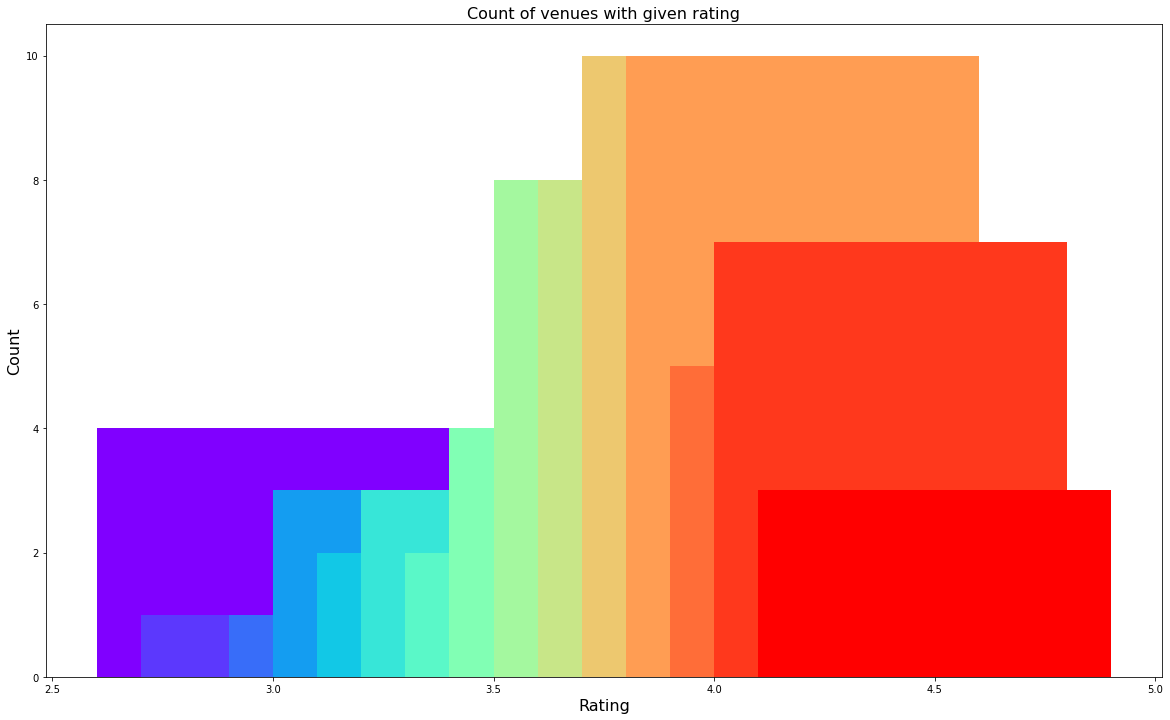

In [ ]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

In [ ]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

In [ ]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

Kolkata_map = folium.Map(location = [K_latitude,K_longitude], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(Kolkata_map)  

#Kolkata_map.save("maps/Venues Ratings.html")
Kolkata_map

Text(0.5, 1.0, 'Count of venues with given average price')

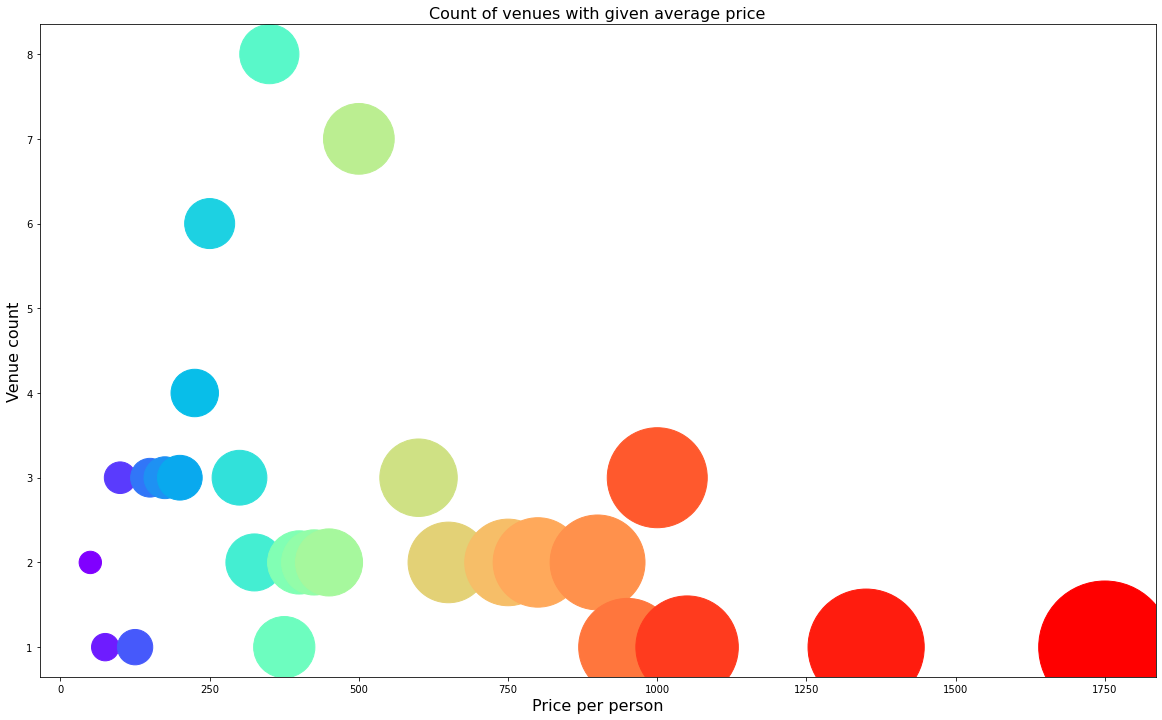

In [ ]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

In [ ]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

Kolkata_map = folium.Map(location = [K_latitude,K_longitude], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(Kolkata_map)  

#Kolkata_map.save("maps/Venues Prices.html")
Kolkata_map

In [ ]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Pub,Blue And Beyond,22.5591,88.3532,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",800.0,Good
1,1,Hotel,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,3.0,3.8,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",750.0,Good
2,0,Indian Restaurant,Peter Cat,22.5525,88.3526,3.0,4.4,"18A, Park Street, Park Street Area, Kolkata",500.0,Very good
3,0,Asian Restaurant,Blue Poppy-Thakali,22.5486,88.3512,2.0,4.0,"Sikkim Commercial House, 1st Floor, 4/1 Middle...",250.0,Good
4,0,Mughlai Restaurant,Arsalan,22.5539,88.3543,3.0,4.2,"119 A, Muzaffar Ahmed Street, Mirza Ghalib Str...",500.0,Very good


In [ ]:
Kolkata_map = folium.Map(location = [K_latitude,K_longitude], zoom_start = 13)
color_map = { 0: 'green', 1: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(Kolkata_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(Kolkata_map)

#Kolkata_map.save("maps/Venues Clusters.html")
Kolkata_map

In [ ]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Indian Restaurant,Peter Cat,22.5525,88.3526,3.0,4.4,"18A, Park Street, Park Street Area, Kolkata",500.0,Very good
1,0,Asian Restaurant,Blue Poppy-Thakali,22.5486,88.3512,2.0,4.0,"Sikkim Commercial House, 1st Floor, 4/1 Middle...",250.0,Good
2,0,Mughlai Restaurant,Arsalan,22.5539,88.3543,3.0,4.2,"119 A, Muzaffar Ahmed Street, Mirza Ghalib Str...",500.0,Very good
3,0,South Indian Restaurant,Anand Restaurant,22.5675,88.3550,2.0,4.4,"19, C.R. Avenue, Near Dalhousie Square Area, C...",250.0,Very good
4,0,Bookstore,Indian Coffee House,22.5761,88.3639,1.0,3.0,"15, Bankim Chatterjee Street, College Street, ...",150.0,Okay
5,0,Café,Cafe Coffee Day,22.5778,88.3904,2.0,3.6,"P-183 A, CIT Road, Scheme 6M, Kankurgachhi, Ko...",350.0,Good
6,0,Bookstore,Burgrill,22.5537,88.3518,2.0,4.0,"12B/2, Park Street Park, Opposite Oxford Book ...",250.0,Good
7,0,Neighborhood,Nutri Bowl,22.5642,88.3524,1.0,4.1,"3A, 1st Floor, Jawaharlal Nehru Road, Esplanad...",100.0,Very good
8,0,Café,Raj Spanish Cafe,22.5584,88.3542,2.0,4.1,"7, Ground Floor, Sudder Street, New Market Are...",300.0,Very good
9,0,BBQ Joint,Oasis,22.5532,88.3524,2.0,4.0,"33, Park Street, Park Street Area, Kolkata",450.0,Good


In [ ]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 1.82 and rating spread around 3.93


In [ ]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Pub,Blue And Beyond,22.5591,88.3532,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",800.0,Good
1,1,Hotel,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,3.0,3.8,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",750.0,Good
2,1,Nightclub,Tantra - The Park,22.5541,88.3514,4.0,3.5,"The Park, 17, Park Street, Park Street Area, K...",1750.0,Good
3,1,Chinese Restaurant,Big Boss,22.5469,88.3879,3.0,4.0,"54C, Matheswartala Road, Tangra, Kolkata",650.0,Good
4,1,Chinese Restaurant,Beijing,22.5465,88.3873,3.0,4.1,"77/1, Christopher Road, Tangra, Kolkata",900.0,Very good
5,1,Chinese Restaurant,Marco Polo,22.5516,88.3538,3.0,4.5,"24, Park Centre Building, Park Street Area, Ko...",800.0,Very good
6,1,Indian Restaurant,Bombay Brasserie,22.5387,88.3656,3.0,4.2,"33, 5th Floor, Quest Mall, Syed Ali Amir Avenu...",950.0,Very good
7,1,Gastropub,Monkey Bar,22.5443,88.3523,3.0,4.3,"801 A - 901 A, Fort Knox Building 6, Abindrana...",750.0,Very good
8,1,Indian Restaurant,SpiceKlub,22.5518,88.3536,4.0,3.9,"1st Floor, 24, Park Street, Annex Building, Ma...",1050.0,Good
9,1,American Restaurant,TGI Fridays,22.5384,88.3513,3.0,4.1,"Forum Mall, 10/3, Elgin Road, Elgin, Kolkata",900.0,Very good


In [ ]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 3.40 and rating spread around 4.08
